# Ola Bike Ride Request Demand Forecast

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
from datetime import date
import calendar
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from statsmodels.stats.stattools import durbin_watson
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv(r'C:\Users\AARYAN\Desktop\aiml\simple-linear-regression-main\simple-linear-regression-main/train_with_random_columns.csv')


In [3]:
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,user_satisfaction,ride_duration,maintenance_flag,special_event_flag,traffic_level,energy_consumption,pollution_index,seasonal_effect,daily_peak_usage,weekend_usage_flag
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0000,3,...,2.502224,6,0,1,8.355383,3.487568,131.061656,0.064113,10,1
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0000,8,...,4.782332,10,1,0,0.967097,3.186343,84.938665,0.431343,14,1
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0000,5,...,1.080013,8,0,1,0.558412,4.393948,77.150844,0.013561,54,1
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0000,3,...,2.781260,17,0,0,5.343973,0.522577,296.262422,-0.955514,12,0
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0000,0,...,4.145837,40,0,0,5.824764,1.157320,249.879843,-0.134720,68,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,19-12-2012 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,...,1.576670,21,1,1,9.135355,1.071108,262.427061,-0.173376,23,1
10882,19-12-2012 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,...,4.996428,56,1,1,0.152363,2.547801,162.357845,0.163810,19,1
10883,19-12-2012 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,...,4.580582,46,0,0,6.832435,1.175477,49.155095,0.508517,42,1
10884,19-12-2012 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,...,2.691140,21,0,1,3.883795,4.045094,2.840904,0.130049,66,0


In [4]:
train_df.shape

(10886, 27)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10886 non-null  int64  
 2   holiday             10886 non-null  int64  
 3   workingday          10886 non-null  int64  
 4   weather             10886 non-null  int64  
 5   temp                10886 non-null  float64
 6   atemp               10886 non-null  float64
 7   humidity            10886 non-null  int64  
 8   windspeed           10886 non-null  float64
 9   casual              10886 non-null  int64  
 10  registered          10886 non-null  int64  
 11  count               10886 non-null  int64  
 12  bike_availability   10886 non-null  int64  
 13  peak_hour_flag      10886 non-null  int64  
 14  temp_variation      10886 non-null  float64
 15  humidity_index      10886 non-null  float64
 16  wind

### Dealing with Null Values

In [6]:
train_df.isnull().sum()

datetime              0
season                0
holiday               0
workingday            0
weather               0
temp                  0
atemp                 0
humidity              0
windspeed             0
casual                0
registered            0
count                 0
bike_availability     0
peak_hour_flag        0
temp_variation        0
humidity_index        0
wind_factor           0
user_satisfaction     0
ride_duration         0
maintenance_flag      0
special_event_flag    0
traffic_level         0
energy_consumption    0
pollution_index       0
seasonal_effect       0
daily_peak_usage      0
weekend_usage_flag    0
dtype: int64

In [7]:
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'bike_availability', 'peak_hour_flag', 'temp_variation',
       'humidity_index', 'wind_factor', 'user_satisfaction', 'ride_duration',
       'maintenance_flag', 'special_event_flag', 'traffic_level',
       'energy_consumption', 'pollution_index', 'seasonal_effect',
       'daily_peak_usage', 'weekend_usage_flag'],
      dtype='object')

In [8]:
train_df.dtypes

datetime               object
season                  int64
holiday                 int64
workingday              int64
weather                 int64
temp                  float64
atemp                 float64
humidity                int64
windspeed             float64
casual                  int64
registered              int64
count                   int64
bike_availability       int64
peak_hour_flag          int64
temp_variation        float64
humidity_index        float64
wind_factor           float64
user_satisfaction     float64
ride_duration           int64
maintenance_flag        int64
special_event_flag      int64
traffic_level         float64
energy_consumption    float64
pollution_index       float64
seasonal_effect       float64
daily_peak_usage        int64
weekend_usage_flag      int64
dtype: object

### Changing into datetime format

In [9]:
def change_into_datetime(col):
    train_df[col] = pd.to_datetime(train_df[col])

In [10]:
for i in ['datetime']:
    change_into_datetime(i)

In [11]:
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['date'] = train_df['datetime'].dt.date
train_df['hour'] = train_df['datetime'].dt.hour
train_df['day of the week'] = train_df['datetime'].dt.dayofweek

In [12]:
train_df['year'].unique()

array([2011, 2012], dtype=int64)

### Mapping key values to Dictionary

In [13]:
dict = {2011 :'1', 2012 :'2'}

In [14]:
train_df['year'] = train_df['year'].map(dict)
train_df['year'].unique()

array(['1', '2'], dtype=object)

In [15]:
train_df.drop('datetime',axis=1,inplace=True)

In [16]:
train_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,energy_consumption,pollution_index,seasonal_effect,daily_peak_usage,weekend_usage_flag,year,month,date,hour,day of the week
0,1,0,0,1,9.84,14.395,81,0.0,3,13,...,3.487568,131.061656,0.064113,10,1,1,1,2011-01-01,0,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,...,3.186343,84.938665,0.431343,14,1,1,1,2011-01-01,1,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,...,4.393948,77.150844,0.013561,54,1,1,1,2011-01-01,2,5
3,1,0,0,1,9.84,14.395,75,0.0,3,10,...,0.522577,296.262422,-0.955514,12,0,1,1,2011-01-01,3,5
4,1,0,0,1,9.84,14.395,75,0.0,0,1,...,1.157320,249.879843,-0.134720,68,0,1,1,2011-01-01,4,5


## Performing Exploratory Data Analysis 

In [17]:
train_df.drop('count',axis=1).describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,special_event_flag,traffic_level,energy_consumption,pollution_index,seasonal_effect,daily_peak_usage,weekend_usage_flag,month,hour,day of the week
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,...,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,...,0.492559,5.001171,2.745646,150.589070,0.001025,54.637700,0.506338,6.50689,11.541613,3.011023
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,...,0.499968,2.884312,1.289058,86.671451,0.576178,25.846345,0.499983,3.44750,6.915838,2.004741
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001751,0.502197,0.068670,-0.999420,10.000000,0.000000,1.00000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,...,0.000000,2.521282,1.623921,74.791535,-0.497701,32.000000,0.000000,4.00000,6.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,...,0.000000,4.953479,2.751366,152.323847,-0.002363,55.000000,1.000000,7.00000,12.000000,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,...,1.000000,7.487621,3.852285,224.764791,0.494745,77.000000,1.000000,9.00000,18.000000,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,...,1.000000,9.998867,4.999604,299.975086,0.999122,99.000000,1.000000,12.00000,23.000000,6.000000


### Visualization of the Correlation Matrix of all the independent features 

<AxesSubplot:>

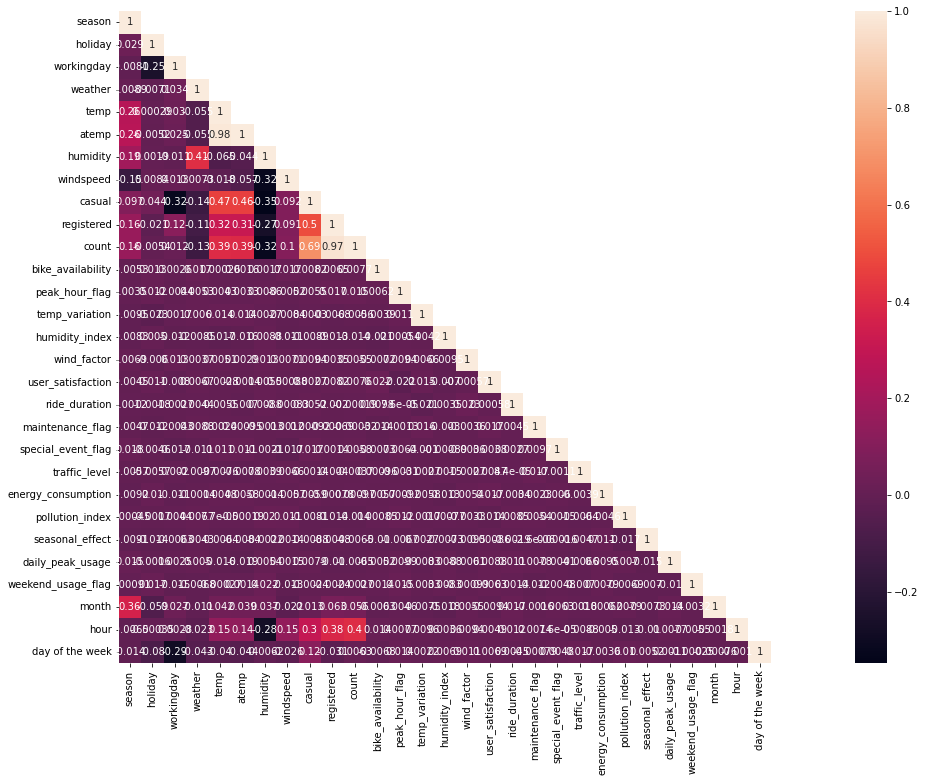

In [18]:
cor_mat= train_df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

## Data Preprocessing

In [19]:
train_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,energy_consumption,pollution_index,seasonal_effect,daily_peak_usage,weekend_usage_flag,year,month,date,hour,day of the week
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,...,3.487568,131.061656,0.064113,10,1,1,1,2011-01-01,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,...,3.186343,84.938665,0.431343,14,1,1,1,2011-01-01,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,...,4.393948,77.150844,0.013561,54,1,1,1,2011-01-01,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,...,0.522577,296.262422,-0.955514,12,0,1,1,2011-01-01,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,...,1.157320,249.879843,-0.134720,68,0,1,1,2011-01-01,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,...,1.071108,262.427061,-0.173376,23,1,2,12,2012-12-19,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,...,2.547801,162.357845,0.163810,19,1,2,12,2012-12-19,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,...,1.175477,49.155095,0.508517,42,1,2,12,2012-12-19,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,...,4.045094,2.840904,0.130049,66,0,2,12,2012-12-19,22,2


In [20]:
train_df["year"] = pd.to_numeric(train_df["year"])

### Performing One Hot Encoding on categorical features

In [21]:
season = pd.get_dummies(train_df['season'],prefix='season',drop_first=True)
weather = pd.get_dummies(train_df['weather'],prefix='weather',drop_first=True)
holiday = pd.get_dummies(train_df['holiday'],prefix='holiday',drop_first=True)
month = pd.get_dummies(train_df['month'],prefix='month',drop_first=True)
hour = pd.get_dummies(train_df['hour'],prefix='hour',drop_first=True)
train_df = pd.concat([train_df,season,weather,holiday,month,hour],axis=1)
train_df.drop(['season','weather','holiday','month','hour'], axis=1,inplace=True)

In [22]:
pd.set_option('display.max_columns',52)
train_df.head()

,workingday,temp,atemp,humidity,windspeed,casual,registered,count,bike_availability,peak_hour_flag,temp_variation,humidity_index,wind_factor,user_satisfaction,ride_duration,maintenance_flag,special_event_flag,traffic_level,energy_consumption,pollution_index,seasonal_effect,daily_peak_usage,weekend_usage_flag,year,date,day of the week,...,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,9.84,14.395,81,0.0,3,13,16,38,0,-1.319785,54.328966,7.219966,2.502224,6,0,1,8.355383,3.487568,131.061656,0.064113,10,1,1,2011-01-01,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,9.02,13.635,80,0.0,8,32,40,28,1,-1.244111,27.993777,11.776051,4.782332,10,1,0,0.967097,3.186343,84.938665,0.431343,14,1,1,2011-01-01,5,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,9.02,13.635,80,0.0,5,27,32,14,1,4.793500,54.274472,15.798666,1.080013,8,0,1,0.558412,4.393948,77.150844,0.013561,54,1,1,2011-01-01,5,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,9.84,14.395,75,0.0,3,10,13,42,1,-1.960991,16.886869,4.616225,2.781260,17,0,0,5.343973,0.522577,296.262422,-0.955514,12,0,1,2011-01-01,5,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,9.84,14.395,75,0.0,0,1,1,7,1,-2.347725,74.564580,4.115658,4.145837,40,0,0,5.824764,1.157320,249.879843,-0.134720,68,0,1,2011-01-01,5,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Dropping the features with low correlation

In [23]:
train_df.drop(['date','day of the week','year','windspeed','workingday'], axis=1, inplace=True)

In [24]:
train_df.head()

,temp,atemp,humidity,casual,registered,count,bike_availability,peak_hour_flag,temp_variation,humidity_index,wind_factor,user_satisfaction,ride_duration,maintenance_flag,special_event_flag,traffic_level,energy_consumption,pollution_index,seasonal_effect,daily_peak_usage,weekend_usage_flag,season_2,season_3,season_4,weather_2,weather_3,...,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,9.84,14.395,81,3,13,16,38,0,-1.319785,54.328966,7.219966,2.502224,6,0,1,8.355383,3.487568,131.061656,0.064113,10,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9.02,13.635,80,8,32,40,28,1,-1.244111,27.993777,11.776051,4.782332,10,1,0,0.967097,3.186343,84.938665,0.431343,14,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9.02,13.635,80,5,27,32,14,1,4.793500,54.274472,15.798666,1.080013,8,0,1,0.558412,4.393948,77.150844,0.013561,54,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9.84,14.395,75,3,10,13,42,1,-1.960991,16.886869,4.616225,2.781260,17,0,0,5.343973,0.522577,296.262422,-0.955514,12,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9.84,14.395,75,0,1,1,7,1,-2.347725,74.564580,4.115658,4.145837,40,0,0,5.824764,1.157320,249.879843,-0.134720,68,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
train_df.columns.to_series().groupby(train_df.dtypes).groups

{uint8: ['season_2', 'season_3', 'season_4', 'weather_2', 'weather_3', 'weather_4', 'holiday_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'], int64: ['humidity', 'casual', 'registered', 'count', 'bike_availability', 'peak_hour_flag', 'ride_duration', 'maintenance_flag', 'special_event_flag', 'daily_peak_usage', 'weekend_usage_flag'], float64: ['temp', 'atemp', 'temp_variation', 'humidity_index', 'wind_factor', 'user_satisfaction', 'traffic_level', 'energy_consumption', 'pollution_index', 'seasonal_effect']}

In [26]:
train_df.dtypes

temp          float64
atemp         float64
humidity        int64
casual          int64
registered      int64
               ...   
hour_19         uint8
hour_20         uint8
hour_21         uint8
hour_22         uint8
hour_23         uint8
Length: 62, dtype: object

### Visualization of the Correlation Matrix of the preprocessed data

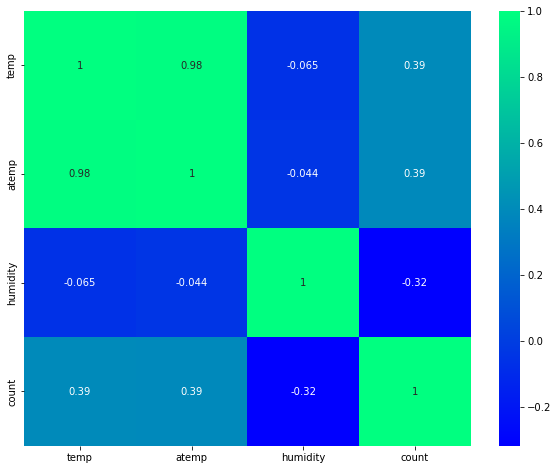

In [27]:
corrdata = train_df[["temp","atemp","humidity","count"]]
corrmat = corrdata.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrmat, annot = True, cmap= 'winter');

<AxesSubplot:>

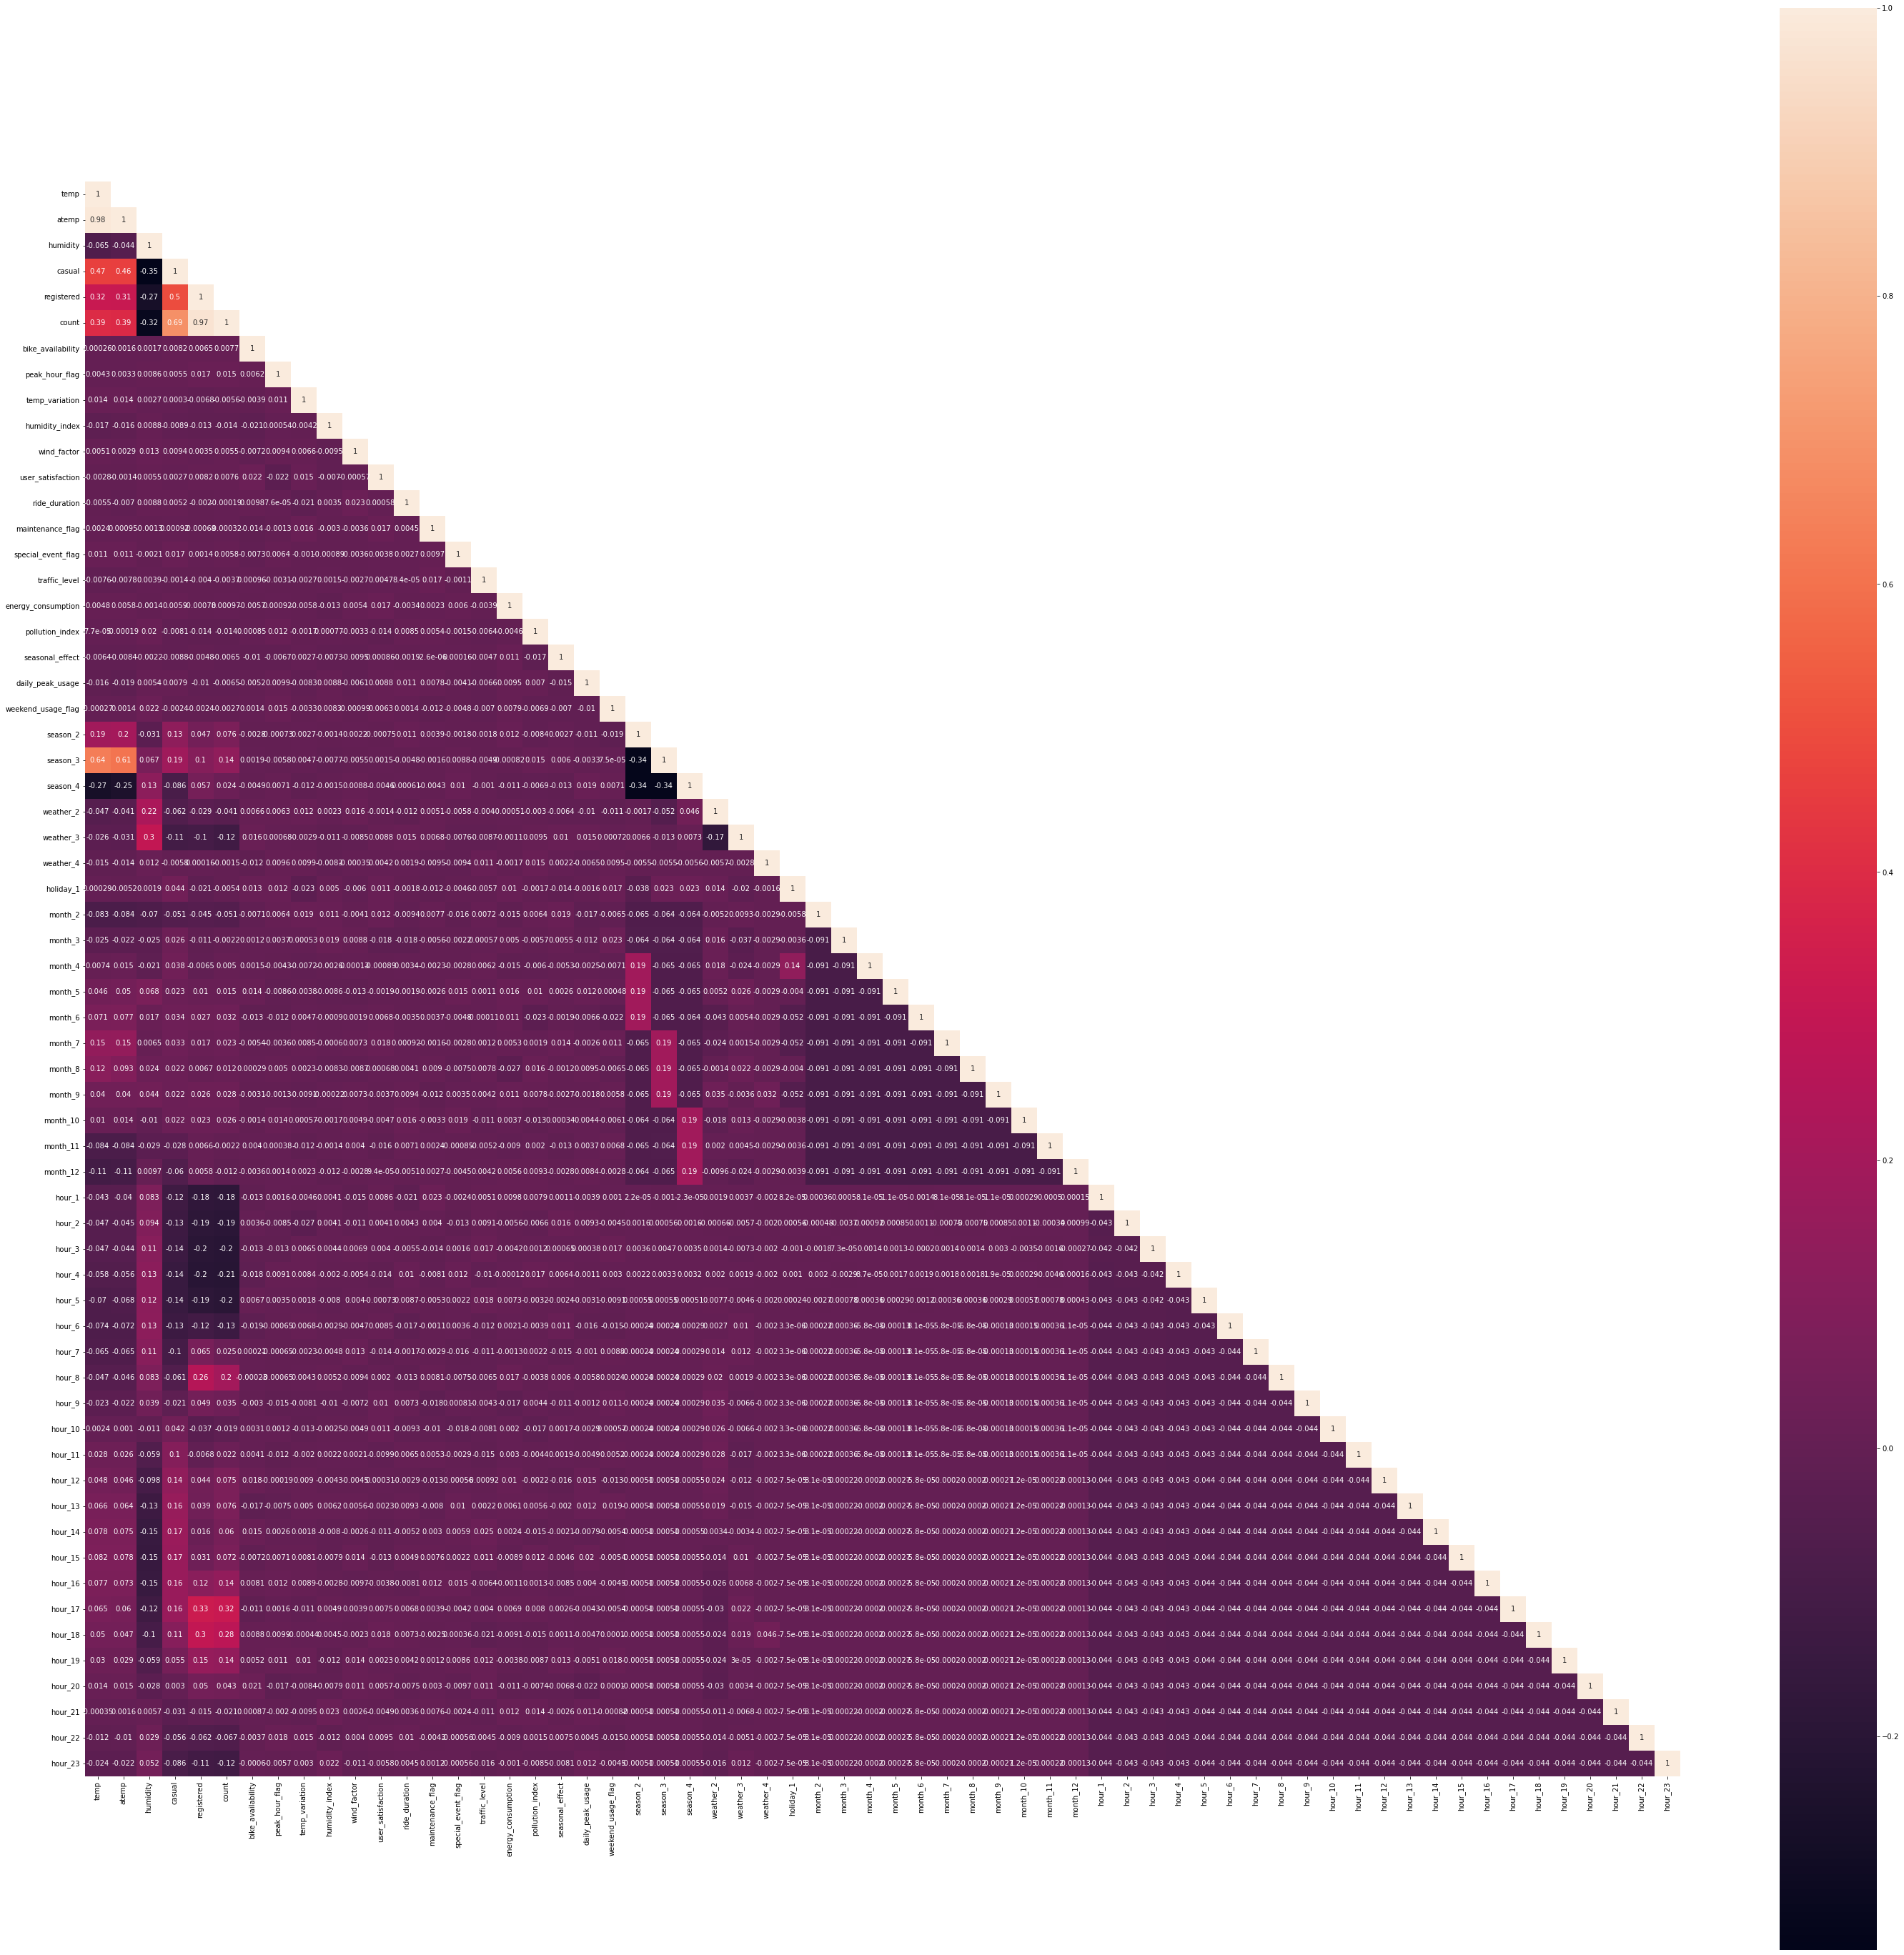

In [28]:
cor_mat= train_df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(50,50)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

### Splitting the data

In [29]:
X = train_df.drop('count',axis=1)

In [30]:
X.shape

(10886, 61)

In [31]:
y = np.log(train_df['count'])

In [32]:
y.shape

(10886,)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [35]:
# dimensions of train and test data
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('train_labels', y_train.shape)
print('test_labels', y_test.shape)

X_train (8708, 61)
X_test (2178, 61)
train_labels (8708,)
test_labels (2178,)


In [36]:
# description of train and test data
X_train.describe()
X_test.describe()
y_train.describe()
y_test.describe()

count    2178.000000
mean        4.595862
std         1.465022
min         0.000000
25%         3.850148
50%         4.976734
75%         5.662091
max         6.849066
Name: count, dtype: float64

# LINEAR REGRESSION

In [37]:
#SLR MODEL
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # object regressor is created
regressor.fit(X_train, y_train) # Fitting Linear Regression to the Training set

LinearRegression()

In [38]:
print(X_train.columns)

Index(['temp', 'atemp', 'humidity', 'casual', 'registered',
       'bike_availability', 'peak_hour_flag', 'temp_variation',
       'humidity_index', 'wind_factor', 'user_satisfaction', 'ride_duration',
       'maintenance_flag', 'special_event_flag', 'traffic_level',
       'energy_consumption', 'pollution_index', 'seasonal_effect',
       'daily_peak_usage', 'weekend_usage_flag', 'season_2', 'season_3',
       'season_4', 'weather_2', 'weather_3', 'weather_4', 'holiday_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23'],
      dtype='object')


In [39]:
y_pred = regressor.predict(X_test)

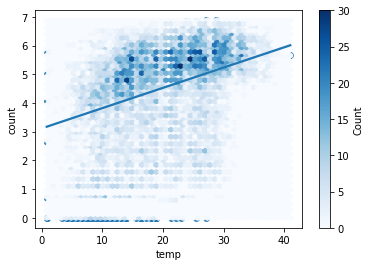

In [40]:
# Regression plot for training set results
dataframe_training = pd.DataFrame() 
dataframe_training['temp'] = X_train['temp'] 
dataframe_training['count'] = y_train 
ax = sns.regplot(x="temp", y="count", data= dataframe_training)
#Used hexplot as the regression plot was getting very cluttered and the best fit line was not visible
plt.hexbin(dataframe_training['temp'], dataframe_training['count'], gridsize=50, cmap='Blues')
plt.colorbar(label='Count')


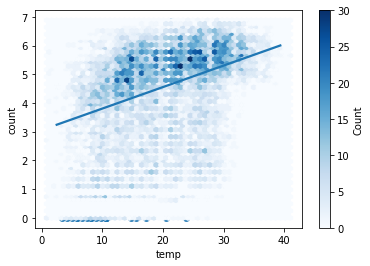

In [41]:
# Regression plot for test set results
dataframe_test = pd.DataFrame()
dataframe_test['temp'] = X_test['temp']
dataframe_test['count'] = y_test
ax = sns.regplot(x="temp", y="count", data= dataframe_test ) 
#Used hexplot as the regression plot was getting very cluttered and the best fit line was not visible
plt.hexbin(dataframe_training['temp'], dataframe_training['count'], gridsize=50, cmap='Blues')
plt.colorbar(label='Count')

Mean squared error: 0.2655929735374848
R square: 0.8761979805831308


<AxesSubplot:xlabel='count', ylabel='Density'>

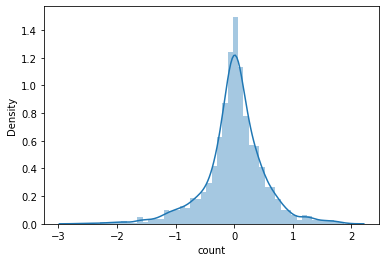

In [42]:
#MODEL EVALUATION: MSE, R2
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred))) # comparing y_pred with y_test
print("R square: {}".format(r2_score(y_test, y_pred)))
#bargraph and kernal density plot
sns.distplot(y_test-y_pred)

### Using Decision Tree

In [54]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [55]:
dt_rg = DecisionTreeRegressor(max_depth=5)

In [56]:
dt_rg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [57]:
preds2 = dt_rg.predict(X_test)

In [58]:
preds2

array([5.57114598, 2.33690428, 5.38614258, ..., 4.9634781 , 6.64012159,
       3.54547962])

r2_score is:0.9902184263140067
MAE: 0.11272754333474533
MSE: 0.02098444963479328


<AxesSubplot:xlabel='count', ylabel='Density'>

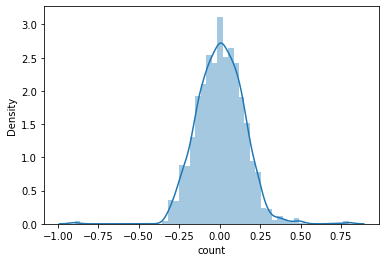

In [59]:
r2_score = metrics.r2_score(y_test,preds2)
print('r2_score is:{}'.format(r2_score))

print('MAE:',metrics.mean_absolute_error(y_test,preds2))
print('MSE:',metrics.mean_squared_error(y_test,preds2))
#difference b/w predicted and actual value
sns.distplot(y_test-preds2)



#### Accuracy -  99.03%

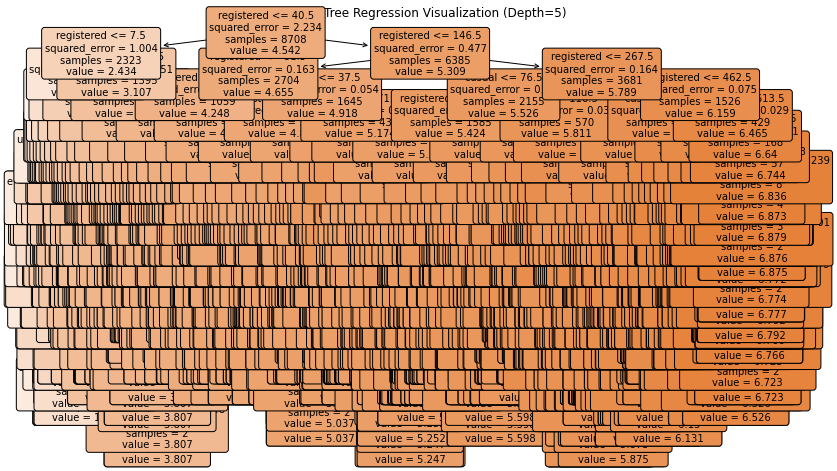

In [61]:
plt.figure(figsize=(12, 8))
plot_tree(tree_model, filled=True, feature_names=X_train.columns, rounded=True, fontsize=10)
plt.title("Decision Tree Regression Visualization (Depth=5)")
plt.show()

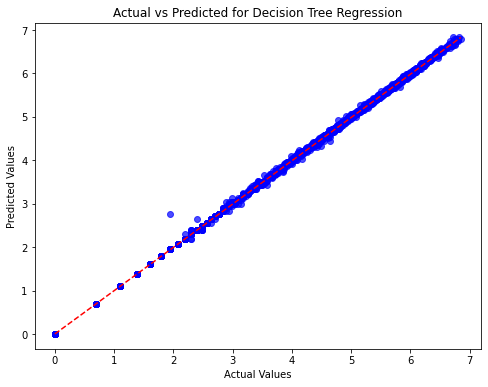

In [62]:
# Predict on test data
y_pred = tree_model.predict(X_test)

# Scatter plot: Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_pred.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted for Decision Tree Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


### Using Hypertuned KNN 

In [65]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [66]:
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn = GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_knn.fit(X_train,y_train)
preds3 = clf_knn.predict(X_test)

In [67]:
preds3

array([5.62940162, 1.46423771, 5.09424992, ..., 4.97861765, 6.58518135,
       2.93056201])

r2_score is:0.9455149235431795
MAE: 0.1641380665057368
MSE: 0.11688705513645593
RMSE: 0.34188748900253124


<AxesSubplot:xlabel='count', ylabel='Density'>

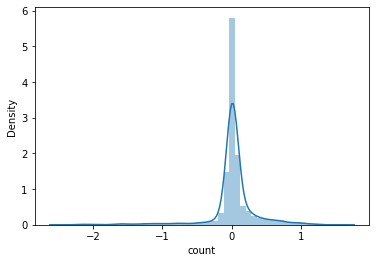

In [68]:
r2_score = metrics.r2_score(y_test,preds3)
print('r2_score is:{}'.format(r2_score))

print('MAE:',metrics.mean_absolute_error(y_test,preds3))
print('MSE:',metrics.mean_squared_error(y_test,preds3))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,preds3)))
sns.distplot(y_test-preds3)

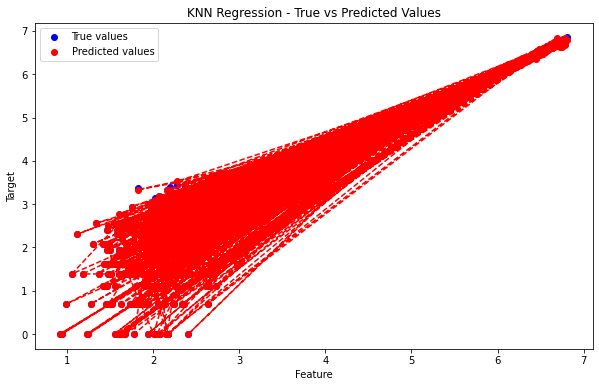

In [69]:
# Scatter plot of true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(preds3, y_test, color='blue', label='True values')
plt.scatter(preds3, y_pred, color='red', label='Predicted values')
plt.plot(preds3, y_pred, color='red', linestyle='--')  # Line for regression predictions
plt.title("KNN Regression - True vs Predicted Values")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

### Using Hypertuned Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
no_of_test=[500]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf = GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(X_train,y_train)
preds4 = clf_rf.predict(X_test)

In [57]:
preds4

array([5.32437205, 2.6424776 , 6.56678309, ..., 3.93086607, 4.78797423,
       5.42869231])

r2_score is:0.9995645963092537
MAE: 0.008555544430297804
MSE: 0.0009681991694704756


<AxesSubplot:xlabel='count', ylabel='Density'>

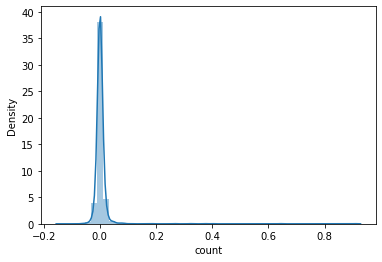

In [58]:
r2_score = metrics.r2_score(y_test,preds4)
print('r2_score is:{}'.format(r2_score))

print('MAE:',metrics.mean_absolute_error(y_test,preds4))
print('MSE:',metrics.mean_squared_error(y_test,preds4))
sns.distplot(y_test-preds4)

### Using Hypertuned XGBoost

In [59]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [60]:
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }
    XGB = XGBRegressor()
    
    gridsearch = GridSearchCV(estimator = XGB,
                           param_grid = param_tuning,                        
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gridsearch.fit(X_train,y_train)

    return gridsearch.best_params

In [61]:
import xgboost as xgb

# Convert data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters
params = {
    'objective': 'reg:squarederror',
    'colsample_bytree': 0.5,
    'learning_rate': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,
    'subsample': 0.7,
}

# Train model with early stopping
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=[(dtest, 'eval')],
    early_stopping_rounds=5,
    verbose_eval=False
)


In [62]:
# Get the best number of boosting rounds
best_iteration = xgb_model.best_iteration
print(f"Best iteration: {best_iteration}")


Best iteration: 551


In [63]:
# Predict using the trained model
preds = xgb_model.predict(dtest)


Mean Squared Error: 0.004028233795228083
R2 Score: 0.9981884844390118


<AxesSubplot:xlabel='count', ylabel='Density'>

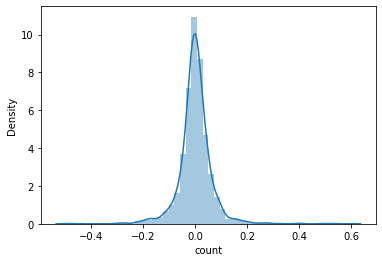

In [64]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R2 Score
mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")
sns.distplot(y_test-preds)

#### Accuracy - 99.97%

# Ridge Regression

Mean Squared Error: 0.26567117614814223
R2 Score: 0.876161527656707


<AxesSubplot:xlabel='count', ylabel='Density'>

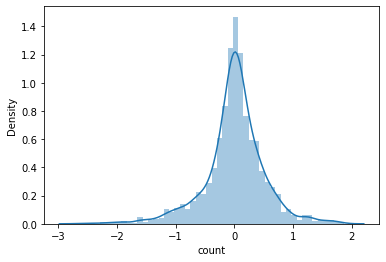

In [70]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Ridge model with a regularization parameter (alpha)
ridge_model = Ridge(alpha=1.0)

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Predict on test data
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)
sns.distplot(y_test-y_pred)


# Lasso Regression

In [66]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [67]:
# Initialize the Lasso model with a specified regularization strength (alpha)
lasso = Lasso(alpha=0.1)  # You can adjust the alpha value to control regularization strength

# Fit the model to the training data
lasso.fit(X_train, y_train)


Lasso(alpha=0.1)

In [68]:
# Predict on the test data
y_pred = lasso.predict(X_test)


Mean Squared Error: 0.7497255303437093
R2 Score: 0.6628449256603088


<AxesSubplot:xlabel='count', ylabel='Density'>

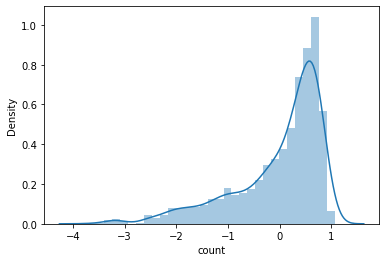

In [69]:
# Calculate Mean Squared Error and R2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")
sns.distplot(y_test-y_pred)


# Elastic Net Regression

In [71]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Elastic Net Regression model
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)  # alpha: regularization strength, l1_ratio: L1/L2 mixing ratio
elastic_net.fit(X_train, y_train)

# Predictions
y_pred = elastic_net.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
print("Elastic Net Coefficients:", elastic_net.coef_)


Mean Squared Error: 0.7920162679577022
R-squared: 0.6512038082552103
Elastic Net Coefficients: [ 0.          0.00414933 -0.0054058   0.00611678  0.00637432  0.
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.          0.         -0.         -0.
 -0.          0.         -0.          0.          0.          0.
 -0.          0.          0.         -0.         -0.         -0.
  0.         -0.         -0.          0.          0.         -0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.          0.          0.         -0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.         -0.          0.          0.          0.          0.
  0.        ]


# Multiple Linear Regression

In [70]:
from sklearn.metrics import r2_score



In [71]:
# Step 2: Define Features (X) and Target (y)
X = train_df[['registered', 'atemp', 'humidity']]
y = train_df['bike_availability']

In [72]:
# STEP: CHECK FOR MULTICOLLINEARITY Adding a constant term for VIF calculation,
# checks for multicollinearity among the features in X using Variance Inflation Factor (VIF).
X_with_const = sm.add_constant(X)       #adds a constant term (intercept) to the feature set X.

# Calculating VIF for each feature
vif_data = pd.DataFrame()    # initializes an empty DataFrame to store VIF values.
vif_data["Feature"] = X_with_const.columns     #assigns the names
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
print("VIF values:\n", vif_data)                                 #measures how much the variance of a regression coefficient 
                                                                #is inflated due to multicollinearity with other features.

# If VIF > 10, consider removing variables with high multicollinearity

VIF values:
       Feature        VIF
0       const  21.129786
1  registered   1.194028
2       atemp   1.111995
3    humidity   1.077868


In [73]:
# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#20% of the data is reserved for testing, while 80% is used for training the model.
# random state meaning the data will always be split in the same way.

In [74]:
# Step 4: Building the Linear Regression Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [75]:
# STEP 10: PREDICTING ON TEST DATA
y_pred = regressor.predict(X_test)

In [76]:
# STEP 11: MODEL EVALUATION
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 201.7141514229313
R2 Score: -0.001095900799982008


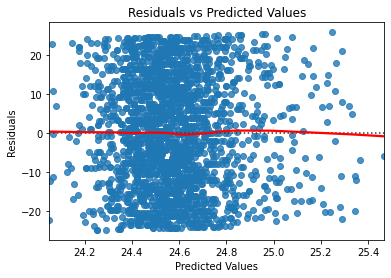

In [77]:
# STEP 12: CHECK FOR HOMOSCEDASTICITY
# Plotting residuals vs. predicted values
#Homoscedasticity means that the residuals (errors) have constant variance across all levels 
#of the predicted values.
residuals = y_test - y_pred                #tells error
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

#If there's a funnel shape (widening or narrowing), it indicates heteroscedasticity, 
#meaning the variance of the residuals changes with the predicted values, which violates the linear regression assumption.

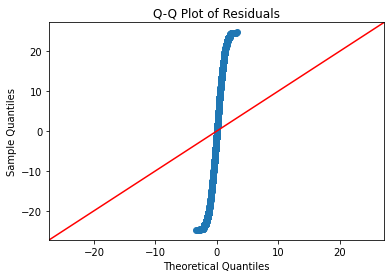

In [78]:
# STEP 13: CHECK FOR NORMALITY OF RESIDUALS
# Q-Q plot for residuals
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

#Normality of residuals is important for the accuracy of p-values and confidence intervals in linear regression.
#If residuals are not normally distributed, the model's statistical inference might be less reliable.

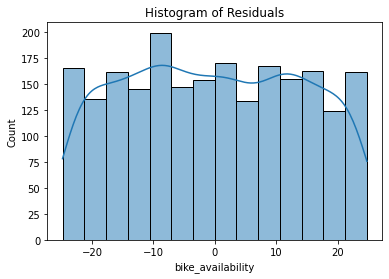

In [77]:
# Alternatively, plot histogram
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()

In [78]:
# Kolmogorov-Smirnov test for normality
k_stat, p_value = stats.kstest(residuals, 'norm')
print(f"Kolmogorov-Smirnov test statistic: {k_stat}, p-value: {p_value}")
# If p-value < 0.05, residuals are not normally distributed

Kolmogorov-Smirnov test statistic: 0.4609437654810918, p-value: 0.0


In [79]:
# STEP 14: CHECK FOR AUTOCORRELATION
# Durbin-Watson test for autocorrelation in residuals
dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_stat}')
# Durbin-Watson value around 2 suggests no autocorrelation

Durbin-Watson statistic: 1.9742509861342823


In [80]:
# STEP 15: CHECK FOR ENDOGENEITY
# Running OLS to check for potential endogeneity issues
X_with_const_train = sm.add_constant(X_train)
model_ols = sm.OLS(y_train, X_with_const_train).fit()
print(model_ols.summary())

# Examining p-values, coefficients, and R-squared
# High p-values (above 0.05) or low R-squared could indicate potential endogeneity issues

                            OLS Regression Results                            
Dep. Variable:      bike_availability   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5606
Date:                Tue, 19 Nov 2024   Prob (F-statistic):              0.641
Time:                        20:06:51   Log-Likelihood:                -35571.
No. Observations:                8708   AIC:                         7.115e+04
Df Residuals:                    8704   BIC:                         7.118e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.2131      0.710     34.084      0.0

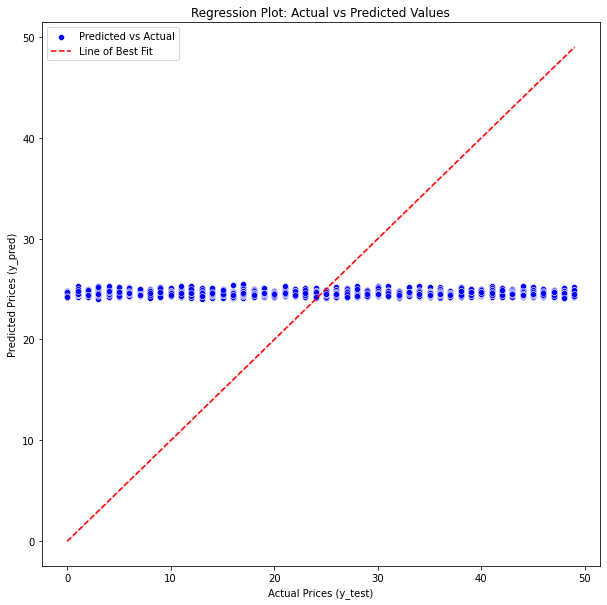

In [81]:
# Step 7: Plotting the Regression Results
y_pred = regressor.predict(X_test)
plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted vs Actual')
sns.lineplot(x=y_test, y=y_test, color='red', label='Line of Best Fit', linestyle='--')

plt.title('Regression Plot: Actual vs Predicted Values')
plt.xlabel('Actual Prices (y_test)')
plt.ylabel('Predicted Prices (y_pred)')
plt.legend()
plt.show()